In [8]:
import numpy as np

## Q2
Using K-NN

In [7]:
import pandas as pd

In [9]:
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

In [10]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


In [11]:
df = pd.read_csv(r"D:\Downloads\Q2 Dataset\dataset.csv" ,header=None)
# Reset index

df = df.reset_index(drop=True)
df.columns = [f'feature{i}' for i in range(1, len(df.columns) + 1)]


df

,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,...,feature1015,feature1016,feature1017,feature1018,feature1019,feature1020,feature1021,feature1022,feature1023,feature1024
0,35,45,45,48,50,52,54,60,61,65,...,7,6,7,6,6,8,8,9,9,9
1,13,12,11,13,11,12,11,12,16,22,...,47,68,74,64,71,72,72,67,62,58
2,12,15,20,24,27,30,42,48,49,57,...,6,6,12,17,15,10,9,9,8,7
3,9,8,7,7,8,9,15,19,29,34,...,123,54,10,10,10,7,6,7,7,18
4,114,112,112,112,112,108,116,118,118,115,...,65,62,59,53,49,44,37,36,37,42
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1695,27,27,27,30,29,30,30,28,30,37,...,8,5,6,5,6,6,6,6,6,6
1696,25,26,26,29,30,29,30,32,35,43,...,11,6,6,6,6,6,6,6,6,7
1697,9,8,6,7,6,8,8,10,10,13,...,170,19,24,27,25,23,15,14,23,30
1698,9,7,6,6,8,8,9,11,14,20,...,235,145,39,34,29,24,13,25,21,26


In [72]:
#df.isnull().sum()

In [ ]:
#vectors refer to the feature representations of the images.
#magnitude -> the length or size of each feature vector
# the vectors are the feature representations of the images, and the magnitudes represent the lengths of these feature vectors

In [12]:
normalized = []
for index, row in df.iterrows():  # iterating over rows 
    
    magnitude = np.sqrt(np.sum(row ** 2))  # Calculate the magnitude of the current row vector
    n_row = row / magnitude  # Normalize the row vector by dividing by its magnitude
    normalized.append(n_row)  # Append the normalized row to the list

In [83]:
#normalized

In [13]:
df_n = pd.DataFrame(normalized, columns=df.columns) 

In [20]:
df_n

,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,...,feature1015,feature1016,feature1017,feature1018,feature1019,feature1020,feature1021,feature1022,feature1023,feature1024
0,0.021796,0.028023,0.028023,0.029891,0.031137,0.032382,0.033628,0.037364,0.037987,0.040478,...,0.004359,0.003736,0.004359,0.003736,0.003736,0.004982,0.004982,0.005605,0.005605,0.005605
1,0.006237,0.005757,0.005277,0.006237,0.005277,0.005757,0.005277,0.005757,0.007676,0.010555,...,0.022549,0.032623,0.035502,0.030704,0.034063,0.034542,0.034542,0.032144,0.029745,0.027826
2,0.007085,0.008856,0.011808,0.014169,0.015941,0.017712,0.024796,0.028339,0.028929,0.033652,...,0.003542,0.003542,0.007085,0.010037,0.008856,0.005904,0.005314,0.005314,0.004723,0.004133
3,0.004458,0.003962,0.003467,0.003467,0.003962,0.004458,0.007430,0.009411,0.014364,0.016841,...,0.060923,0.026747,0.004953,0.004953,0.004953,0.003467,0.002972,0.003467,0.003467,0.008916
4,0.044881,0.044093,0.044093,0.044093,0.044093,0.042518,0.045668,0.046455,0.046455,0.045274,...,0.025590,0.024409,0.023228,0.020866,0.019291,0.017322,0.014567,0.014173,0.014567,0.016535
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1695,0.028712,0.028712,0.028712,0.031902,0.030838,0.031902,0.031902,0.029775,0.031902,0.039345,...,0.008507,0.005317,0.006380,0.005317,0.006380,0.006380,0.006380,0.006380,0.006380,0.006380
1696,0.027285,0.028376,0.028376,0.031650,0.032741,0.031650,0.032741,0.034924,0.038198,0.046929,...,0.012005,0.006548,0.006548,0.006548,0.006548,0.006548,0.006548,0.006548,0.006548,0.007640
1697,0.007730,0.006871,0.005153,0.006012,0.005153,0.006871,0.006871,0.008589,0.008589,0.011165,...,0.146006,0.016318,0.020613,0.023189,0.021472,0.019754,0.012883,0.012024,0.019754,0.025766
1698,0.008116,0.006312,0.005410,0.005410,0.007214,0.007214,0.008116,0.009919,0.012624,0.018035,...,0.211906,0.130750,0.035167,0.030659,0.026150,0.021641,0.011722,0.022543,0.018936,0.023445


In [33]:
labels = []
image = 170


for i, row in df_n.iterrows():
    start_index = i * image
    end_index = (i + 1) * image
    
    if len(df_n) > end_index:
     
        labels.extend([i+1] * image)
    else:
        labels.extend([0] * (len(df_n) - start_index))

# Add labels to dataset
df_n['label'] = labels

In [34]:
df_n

,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,...,feature1016,feature1017,feature1018,feature1019,feature1020,feature1021,feature1022,feature1023,feature1024,label
0,0.021796,0.028023,0.028023,0.029891,0.031137,0.032382,0.033628,0.037364,0.037987,0.040478,...,0.003736,0.004359,0.003736,0.003736,0.004982,0.004982,0.005605,0.005605,0.005605,1
1,0.006237,0.005757,0.005277,0.006237,0.005277,0.005757,0.005277,0.005757,0.007676,0.010555,...,0.032623,0.035502,0.030704,0.034063,0.034542,0.034542,0.032144,0.029745,0.027826,1
2,0.007085,0.008856,0.011808,0.014169,0.015941,0.017712,0.024796,0.028339,0.028929,0.033652,...,0.003542,0.007085,0.010037,0.008856,0.005904,0.005314,0.005314,0.004723,0.004133,1
3,0.004458,0.003962,0.003467,0.003467,0.003962,0.004458,0.007430,0.009411,0.014364,0.016841,...,0.026747,0.004953,0.004953,0.004953,0.003467,0.002972,0.003467,0.003467,0.008916,1
4,0.044881,0.044093,0.044093,0.044093,0.044093,0.042518,0.045668,0.046455,0.046455,0.045274,...,0.024409,0.023228,0.020866,0.019291,0.017322,0.014567,0.014173,0.014567,0.016535,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1695,0.028712,0.028712,0.028712,0.031902,0.030838,0.031902,0.031902,0.029775,0.031902,0.039345,...,0.005317,0.006380,0.005317,0.006380,0.006380,0.006380,0.006380,0.006380,0.006380,0
1696,0.027285,0.028376,0.028376,0.031650,0.032741,0.031650,0.032741,0.034924,0.038198,0.046929,...,0.006548,0.006548,0.006548,0.006548,0.006548,0.006548,0.006548,0.006548,0.007640,0
1697,0.007730,0.006871,0.005153,0.006012,0.005153,0.006871,0.006871,0.008589,0.008589,0.011165,...,0.016318,0.020613,0.023189,0.021472,0.019754,0.012883,0.012024,0.019754,0.025766,0
1698,0.008116,0.006312,0.005410,0.005410,0.007214,0.007214,0.008116,0.009919,0.012624,0.018035,...,0.130750,0.035167,0.030659,0.026150,0.021641,0.011722,0.022543,0.018936,0.023445,0


In [35]:
df_n["label"].unique()

array([1, 2, 3, 4, 5, 6, 7, 8, 9, 0], dtype=int64)

In [5]:
#train_labels.tolist()

1) Pre-process the dataset by normalizing each face image vector to unit length (i.e., dividing each vector by its magnitude). Next, for each of the 10 subjects, randomly select 150 images for training and use the remaining 20 for testing.

In [ ]:
train = []
test = []

images = 170


for i in range(10):  #  10 subjects
    
    start_index = i * images   
    end_index = (i + 1) * images 
    
    
    subject = list(range(start_index, end_index)) # generating an array from start to end index -> array of one subject
    np.random.shuffle(subject) # shuffles the array of indices randomly.
    
  
    # slicing first 150 to train and rest 20 to test 
    for i in subject[:150]:
        train.append(i)
        
    for i in subject[150:]:
        test.append(i)

# dataframes after split
train_data = df_n.iloc[train]
test_data = df_n.iloc[test]

train_labels = train_data['label'].values.tolist()
test_labels = test_data['label'].values.tolist()

    # Remove labels from train and test data
train_data = train_data.drop(columns=['label'])
test_data = test_data.drop(columns=['label'])

In [ ]:
train_data

In [ ]:
test_data

2) Implement a k Nearest Neighbors (k-NN) classifier from scratch and using the training set and evaluate its performance on the test set. You may not use built-in / library functions to implement the classifier. 
    a. You should also implement Euclidean and cosine similarity distance measures and used them for different values of K.
    b. You should also present results when fewer training images are used 
    (for instead 100 training images and 70 test images per subject)
    c. Write results in the report for k-values 2, 5, 7, and 11 with each distance metric.

In [106]:
#||x-y|| = \sqrt{(x_1-y_1)^2+(x_2-y_2)^2+...+(x_n-y_n)^2}   -> Euclidean distance

In [38]:
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))

In [139]:
#cos(theta) = {x . y}/{||x||. ||y||}  -> cosine similarity

In [39]:
def cosine_similarity(x1, x2):
    dot_product = np.dot(x1, x2)
    
    # magnitude of each vector
    A = np.sqrt(np.sum(x1 ** 2))    
    B = np.sqrt(np.sum(x2 ** 2))

    return dot_product / (A * B)


3) Use Sklearn to apply SVM and GaussianNB on this dataset and compare the accuracy with K-NN in the report.

In [81]:
def neighbors(train_data, test_data ,train_labels , test_labels,  k_values):
    neighbor_dist = []
    accuracies = []
    
    for k in k_values:
        correct_predictions = 0
        
        for test_instance in test_data.values:
            distances_euclidean = []  # List to store Euclidean distances
            distances_cosine = []     # List to store cosine similarity distances
            
            for train_instance in train_data.values:
                dist_euclidean = euclidean_distance(train_instance, test_instance)
                distances_euclidean.append(dist_euclidean)
                
                dist_cosine = cosine_similarity(train_instance, test_instance)
                distances_cosine.append(dist_cosine)
            
            distances_euclidean.sort()
            nearest_neighbors_euclidean = distances_euclidean[:k]
            neighbor_dist.append(nearest_neighbors_euclidean)
            
            distances_cosine.sort()
            nearest_neighbors_cosine = distances_cosine[:k]
            neighbor_dist.append(nearest_neighbors_cosine)
            
        
        print(f"K = {k}, Distance :")
        print("EUCLIDEAN : " , nearest_neighbors_euclidean)
       
        
        print(f"K = {k}, Distance :")
        print( "COSINE : ",nearest_neighbors_cosine)
        
        
        
        
        print("\n...........................\n")
        
        
    svm_model = SVC()
    svm_model.fit(train_data, train_labels)
        
    gnb_model = GaussianNB()
    gnb_model.fit(train_data, train_labels)

    svm_pred = svm_model.predict(test_data)
    svm_accuracy = accuracy_score(test_labels, svm_pred)

    gnb_pred = gnb_model.predict(test_data)
    gnb_accuracy = accuracy_score(test_labels, gnb_pred)


    print("Accuracy of SVM:", svm_accuracy)
    print("Accuracy of GaussianNB:", gnb_accuracy)


    return neighbor_dist, accuracies

In [68]:
def split(train_k , test_k):
    train = []
    test = []

    images = 170

    for i in range(10):  #  10 subjects

        start_index = i * images   
        end_index = (i + 1) * images 


        subject = list(range(start_index, end_index)) # generating an array from start to end index -> array of one subject
        np.random.shuffle(subject) # shuffles the array of indices randomly.


        for i in subject[:train_k]:
            train.append(i)

        for i in subject[train_k:]:
            test.append(i)

    # dataframes after split
    train_data= df_n.iloc[train]
    test_data = df_n.iloc[test]


    train_labels = train_data['label'].values.tolist()
    test_labels = test_data['label'].values.tolist()

        # Remove labels from train and test data
    train_data = train_data.drop(columns=['label'])
    test_data = test_data.drop(columns=['label'])
    
    
    print("TRAIN DATA: ",len(train_data))
    print("TEST DATA: ",len(test_data))
    
    
    
    return train_data , test_data , train_labels , test_labels

In [77]:
def plot():
    # Step 1: Standardize the features
    scaler = StandardScaler()
    scaled_train_data = scaler.fit_transform(train_data)
    scaled_test_data = scaler.transform(test_data)

    # Step 2: Apply PCA
    pca = PCA(n_components=3)
    pca_train_data = pca.fit_transform(scaled_train_data)
    pca_test_data = pca.transform(scaled_test_data)

    # Step 3: Visualize the datasets in 3-D space
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(projection='3d')

    # Plotting training data
    train_size = pca_train_data.shape[0]
    ax.scatter(pca_train_data[:, 0], pca_train_data[:, 1], pca_train_data[:, 2], cmap='viridis', label=f'Training Data ({train_size} points)')

    # Plotting testing data
    test_size = pca_test_data.shape[0]
    ax.scatter(pca_test_data[:, 0], pca_test_data[:, 1], pca_test_data[:, 2], cmap='viridis', label=f'Testing Data ({test_size} points)', marker='^')

    ax.set_xlabel('PC1')
    ax.set_ylabel('PC2')
    ax.set_zlabel('PC3')
    ax.set_title('PCA Visualization of Training and Testing Data')
    ax.legend()

    plt.show()


Enter how many k values you want to enter: 2
Enter number of clusters for k_1: 2
Enter number of clusters for k_2: 5
Enter train split data :100
Enter test split data :70
TRAIN DATA:  1000
TEST DATA:  700
K = 2, Distance :
EUCLIDEAN :  [0.3672152149836403, 0.41491407769822414]
K = 2, Distance :
COSINE :  [0.4848560299574775, 0.4927985287927677]

...........................

K = 5, Distance :
EUCLIDEAN :  [0.3672152149836403, 0.41491407769822414, 0.438767552597269, 0.45791131328070406, 0.5086211923600875]
K = 5, Distance :
COSINE :  [0.4848560299574775, 0.4927985287927677, 0.5086814241907519, 0.508847027651256, 0.5160415434225412]

...........................

Accuracy of SVM: 0.9842857142857143
Accuracy of GaussianNB: 0.8514285714285714


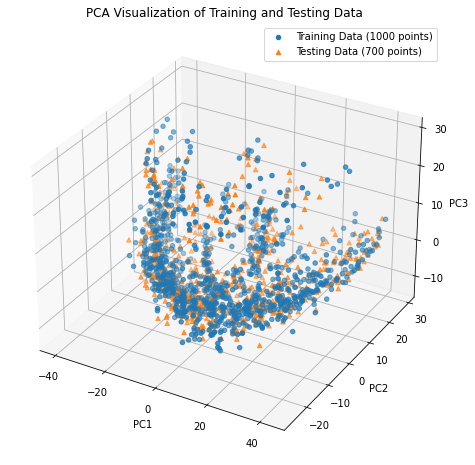

In [82]:
#k=int(input("Enter value of K :"))
#k = [2 ,5,7,11]
k = []
num_k_values = int(input("Enter how many k values you want to enter: "))

for i in range(num_k_values):
    kk = int(input(f"Enter number of clusters for k_{i + 1}: "))
    k.append(kk)

#distance=input("Enter which distance you want to use : (euclidean :1 or cosine :2)")
train= int(input("Enter train split data :"))
test = int(input("Enter test split data :"))

train_data, test_data , train_labels , test_labels = split(train, test)
neighbor_dist, accuracies = neighbors(train_data, test_data, train_labels , test_labels, k)

graph = plot()

In [ ]:
#split(100,70)

In [64]:
#len(train_data)